In [108]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('results.csv')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Printing the sample head
print(data.head())

   id    name      input compiler  threads      real       usr       sys  \
0   1  ferret     simdev      gcc        1  0m0.023s  0m0.030s  0m0.005s   
1   2  ferret   simsmall      gcc        1  0m0.395s  0m0.343s  0m0.017s   
2   3  ferret  simmedium      gcc        1  0m1.470s  0m1.345s  0m0.052s   
3   4  ferret   simlarge      gcc        1  0m6.867s  0m6.535s  0m0.145s   
4   5  ferret     native      gcc        1  6m50.895  6m40.672  0m1.619s   

   cores  
0      1  
1      1  
2      1  
3      1  
4      1  


In [109]:
# Converting execution time to milliseconds

def convertExecutionTime(time):
    MIN_TO_MIL_SECONDS = 60000
    SECONDS_TO_MIL_SECONDS = 1000
    min,seconds = time.split('m')
    seconds = seconds.replace('s','')
    min = int(min) 
    seconds = float(seconds)
    fullTimeinMilliseconds = int(min * MIN_TO_MIL_SECONDS + seconds * SECONDS_TO_MIL_SECONDS) 
    return fullTimeinMilliseconds

data['real'] = data['real'].apply(convertExecutionTime)
data['usr'] = data['usr'].apply(convertExecutionTime)
data['sys'] = data['sys'].apply(convertExecutionTime)



In [110]:
print(data.describe())

                id      threads           real            usr           sys  \
count  3855.000000  3855.000000    3855.000000    3855.000000   3855.000000   
mean   1928.000000    10.463035   38554.242542   44830.111284   1485.290013   
std    1112.986972    10.824693   88747.774795  112770.703391   4259.727504   
min       1.000000     1.000000       4.000000       0.000000      1.000000   
25%     964.500000     2.000000     260.500000     227.000000     18.000000   
50%    1928.000000     4.000000    1122.000000    1185.000000     45.000000   
75%    2891.500000    16.000000    9116.000000    7515.500000    747.500000   
max    3855.000000    32.000000  420039.000000  413117.000000  28688.000000   

             cores  
count  3855.000000  
mean     16.439689  
std       9.266701  
min       1.000000  
25%       8.000000  
50%      16.000000  
75%      24.000000  
max      32.000000  


In [111]:
# plt.scatter(x,y, c='b', marker='x', label='1')
# plt.scatter(x, y, c='r', marker='s', label='-1')
# plt.legend(loc='upper left')
# plt.show()

data.loc[data['name'] == "ferret"]

,id,name,input,compiler,threads,real,usr,sys,cores
0,1,ferret,simdev,gcc,1,23,30,5,1
1,2,ferret,simsmall,gcc,1,395,343,17,1
2,3,ferret,simmedium,gcc,1,1470,1345,52,1
3,4,ferret,simlarge,gcc,1,6867,6535,145,1
4,5,ferret,native,gcc,1,410895,400672,1619,1
...,...,...,...,...,...,...,...,...,...
1920,1921,ferret,simdev,gcc-tbb,32,22,28,6,32
1921,1922,ferret,simsmall,gcc-tbb,32,267,342,18,32
1922,1923,ferret,simmedium,gcc-tbb,32,729,1176,38,32
1923,1924,ferret,simlarge,gcc-tbb,32,2968,5888,91,32


In [112]:
# Plottting charts for gcc-compiler based implementations

c1data = data.loc[data['compiler'] == "gcc"]
c1data


,id,name,input,compiler,threads,real,usr,sys,cores
0,1,ferret,simdev,gcc,1,23,30,5,1
1,2,ferret,simsmall,gcc,1,395,343,17,1
2,3,ferret,simmedium,gcc,1,1470,1345,52,1
3,4,ferret,simlarge,gcc,1,6867,6535,145,1
4,5,ferret,native,gcc,1,410895,400672,1619,1
1925,1926,dedup,simdev,gcc,1,115,63,35,1
1926,1927,dedup,simsmall,gcc,1,754,396,331,1
1927,1928,dedup,simmedium,gcc,1,2341,1287,963,1
1928,1929,dedup,simlarge,gcc,1,14553,8258,6102,1
1929,1930,dedup,native,gcc,1,47432,26080,21023,1


array(['simdev', 'simsmall', 'simmedium', 'simlarge', 'native'],
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

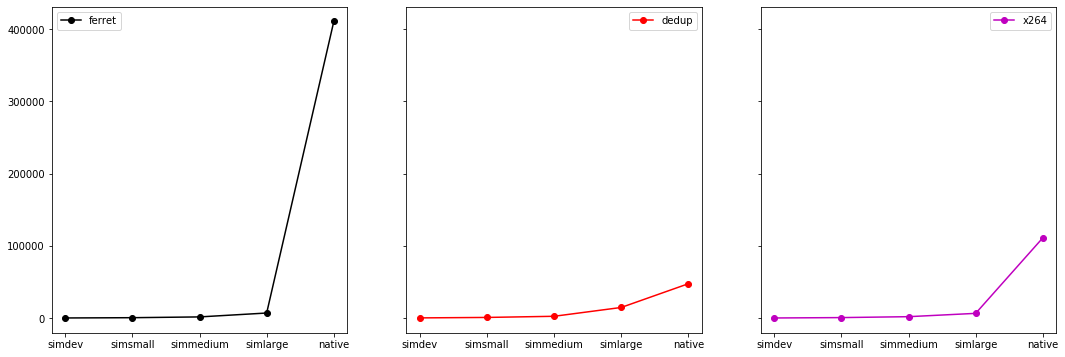

In [113]:
fig=plt.figure() #Creates a new figure
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


axs[0].plot(c1data['input'].unique(),(c1data.loc[data['name'] == "ferret"])['real'],'ko-',label='ferret') #no need for str(x_axis)
axs[1].plot(c1data['input'].unique(),(c1data.loc[data['name'] == "dedup"])['real'],'ro-',label='dedup') 
axs[2].plot(c1data['input'].unique(),(c1data.loc[data['name'] == "x264"])['real'],'mo-',label='x264') 
axs[0].legend()
axs[1].legend()
axs[2].legend()

c1data['input'].unique()

#=======================================================================================================================================
#================ Chart of 3 benchmarks in native workload for gcc compiler configuration which is 1 thread and 1 core==================
#=======================================================================================================================================

In [114]:
# Visualizations for ferret benchmark

ferretData =data.loc[(data['name'] == "ferret") & (data['compiler'] != "gcc")]
ferretData



,id,name,input,compiler,threads,real,usr,sys,cores
5,6,ferret,simdev,gcc-pthreads,1,23,30,4,1
6,7,ferret,simsmall,gcc-pthreads,1,425,374,13,1
7,8,ferret,simmedium,gcc-pthreads,1,1337,1232,52,1
8,9,ferret,simlarge,gcc-pthreads,1,6560,6258,123,1
9,10,ferret,native,gcc-pthreads,1,420039,406024,2610,1
...,...,...,...,...,...,...,...,...,...
1920,1921,ferret,simdev,gcc-tbb,32,22,28,6,32
1921,1922,ferret,simsmall,gcc-tbb,32,267,342,18,32
1922,1923,ferret,simmedium,gcc-tbb,32,729,1176,38,32
1923,1924,ferret,simlarge,gcc-tbb,32,2968,5888,91,32


In [115]:
#  Drawing the matrix chart
def drawMatrixChartForInputs(x,data,axs,combinations,multiline,title,xlabel,ylabel):
    j=0
    for inputCombination in inputCombinations:
        y = data.loc[(data['input'] == inputCombination) ]
        y.head()
        minimum = min(y['real'])
        maximum = max(y['real'])
        i = 0
        for combination in combinations:
            axs[j][i].plot(x,(y.loc[y['threads'] == combination])['real'],label=(str(combination)+"-"+multiline))
            axs[j][i].legend()
            axs[j][i].set_xlabel('cores', fontsize=12)
            axs[j][i].set_ylabel('execution time', fontsize=12)
            axs[j][i].set_title(inputCombination, fontsize=14)
            axs[j][i].set_ylim(bottom=minimum,top=maximum)
            i = i +1
        j = j +1
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)

#Drawing a single Chart
def drawChartForInputs(x,y,axs,combinations,multiline,title,xlabel,ylabel):
    plt.rcParams["figure.figsize"] = (20,20)
    for combination in combinations:
        plt.plot(x,(y.loc[y['threads'] == combination])['real'],label=(str(combination)+"-"+multiline))
      

    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.title(title,fontsize=16)
    plt.legend()

In [116]:
# Chart info : compiler is gcc-pthreads, change cores, number of threads = 1 
# x axis = number of cores
# y axis = execution time


# x axis ticks 
x_axis = ferretData['cores'].unique()

# phtread version
ferretPThreadData =ferretData.loc[ferretData['compiler'] == "gcc-pthreads"]
ferretPThreadData

#=======================================================================================================================================
#================ Charts for Ferret gcc-pthreads version: parallization enabled ===============================================================
#=======================================================================================================================================

,id,name,input,compiler,threads,real,usr,sys,cores
5,6,ferret,simdev,gcc-pthreads,1,23,30,4,1
6,7,ferret,simsmall,gcc-pthreads,1,425,374,13,1
7,8,ferret,simmedium,gcc-pthreads,1,1337,1232,52,1
8,9,ferret,simlarge,gcc-pthreads,1,6560,6258,123,1
9,10,ferret,native,gcc-pthreads,1,420039,406024,2610,1
...,...,...,...,...,...,...,...,...,...
960,961,ferret,simdev,gcc-pthreads,32,22,28,6,32
961,962,ferret,simsmall,gcc-pthreads,32,280,367,14,32
962,963,ferret,simmedium,gcc-pthreads,32,772,1238,53,32
963,964,ferret,simlarge,gcc-pthreads,32,3073,6606,133,32


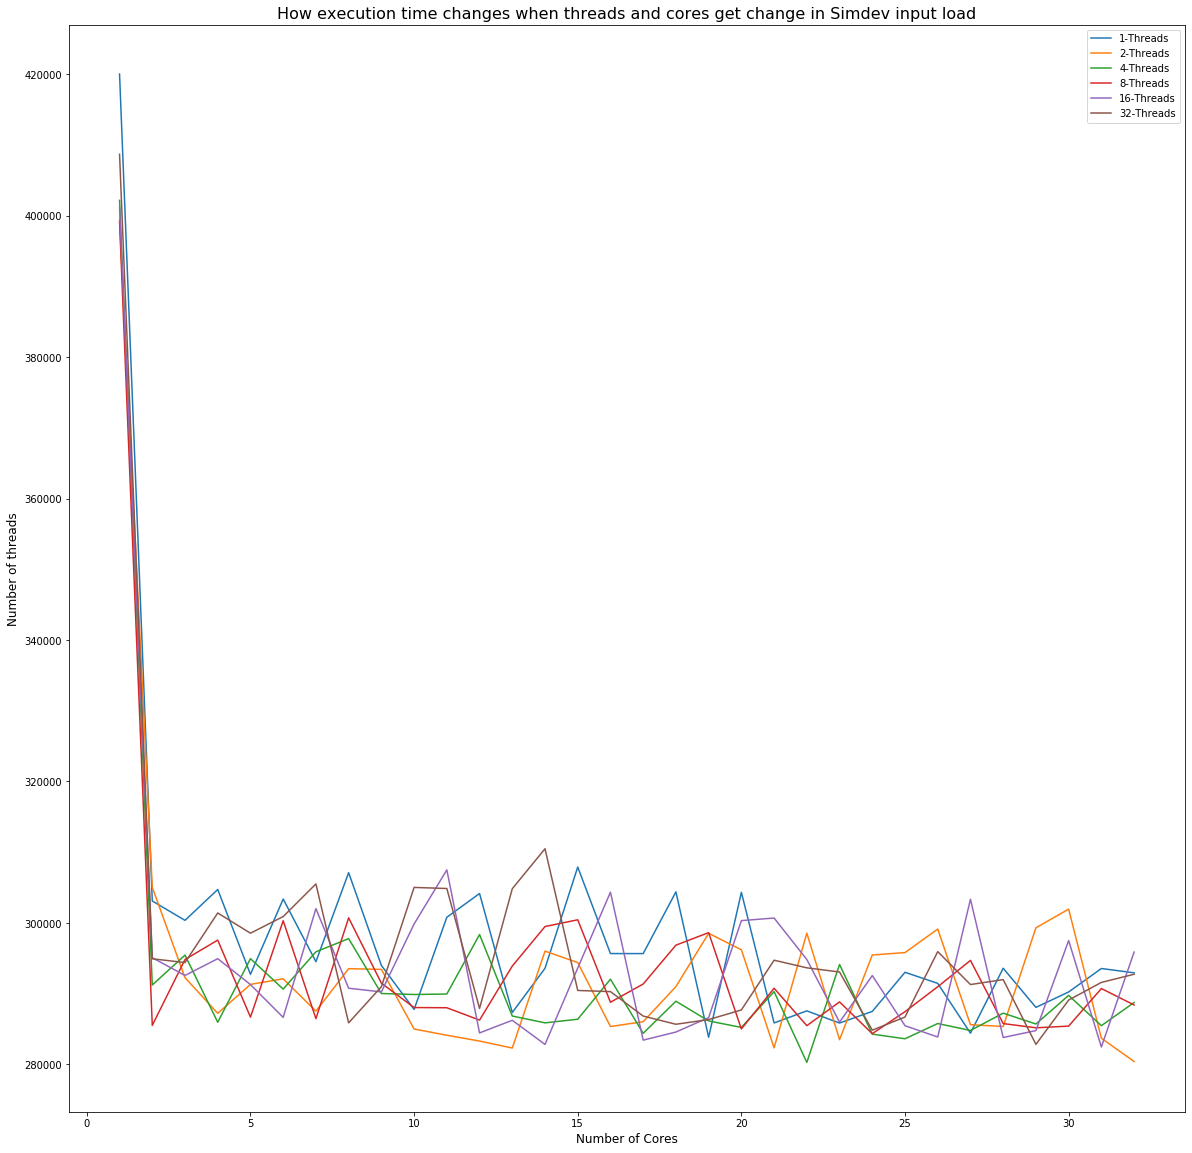

In [122]:
# Filtering for simdev
inputCombinationData = ferretPThreadData.loc[(ferretPThreadData['input'] == "native") ]

drawChartForInputs(x_axis,inputCombinationData,axs,combinations,'Threads',"How execution time changes when threads and cores get change in Simdev input load",'Number of Cores',"Number of threads")

<Figure size 1440x1440 with 0 Axes>

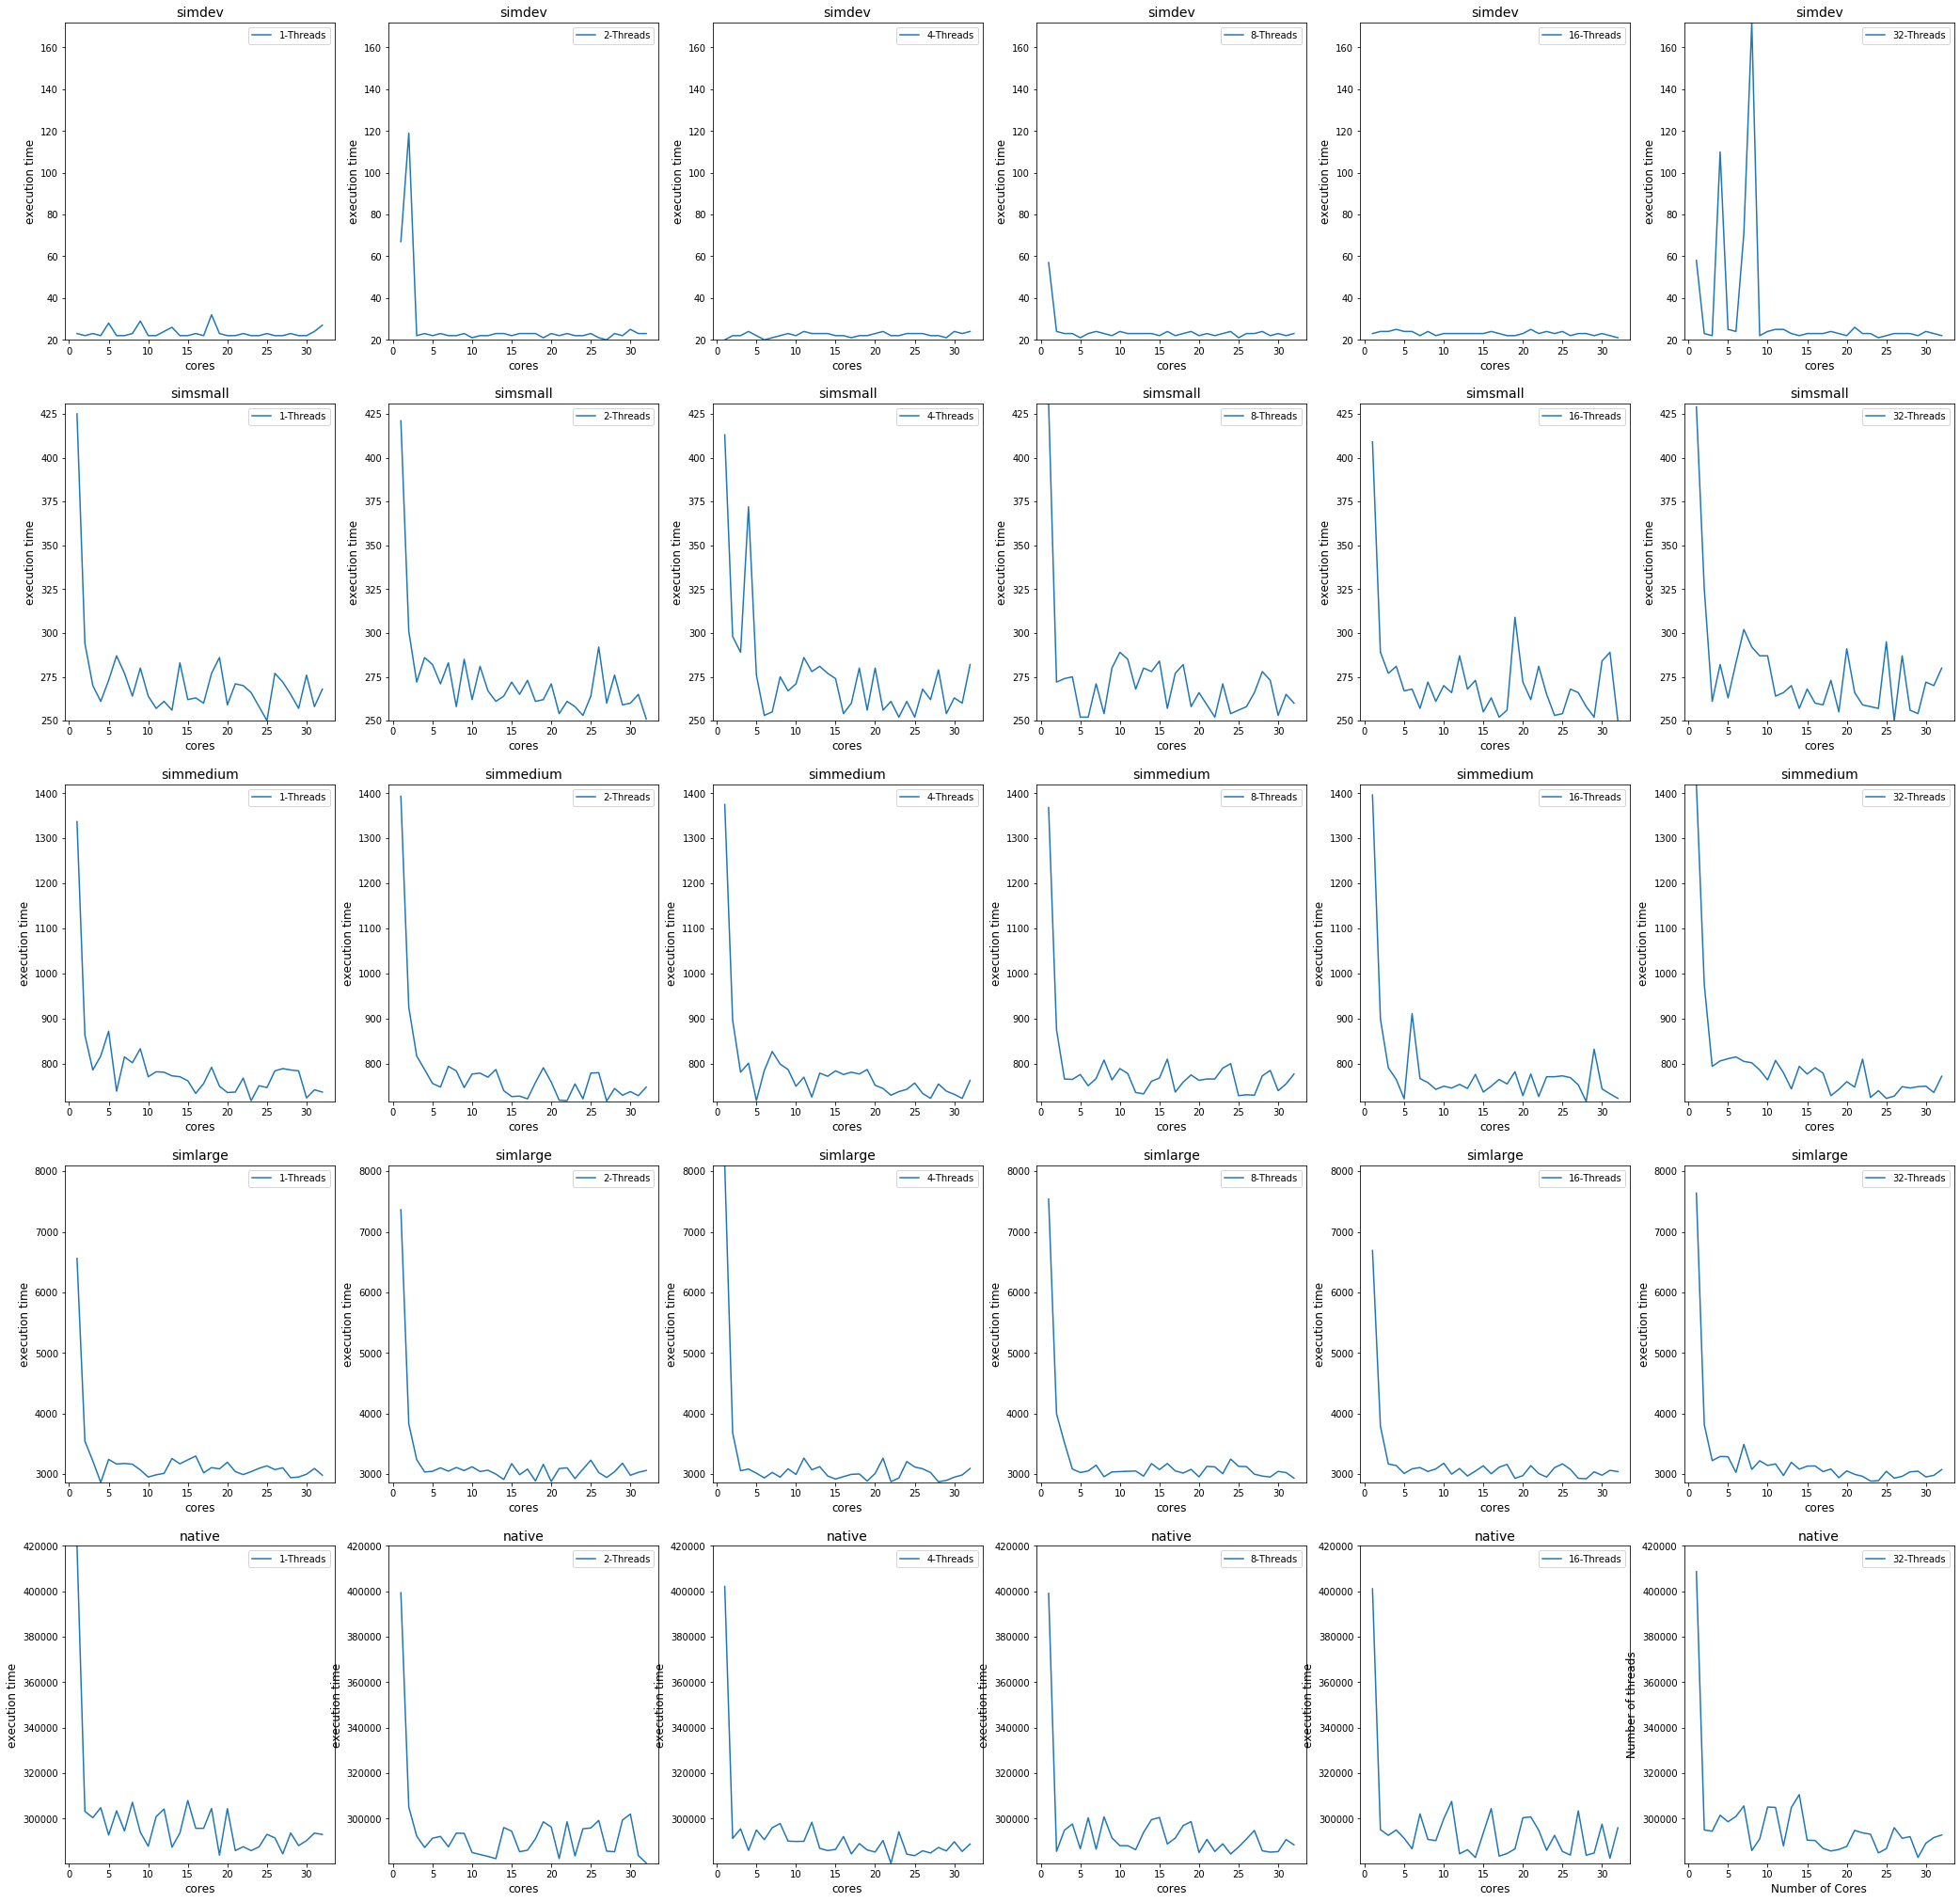

In [118]:

fig=plt.figure() #Creates a new figure
fig, axs = plt.subplots(5,6, figsize=(36, 36))
# axs[0,0].plot(x_axis,(inputCombinationData.loc[inputCombinationData['threads'] == 1])['real'],label='1 thread') #no need for str(x_axis)

# axs[0,0].plot(x_axis,(inputCombinationData.loc[inputCombinationData['threads'] == 2])['real'],label='2 threaded') #no need for str(x_axis)
# axs[0,0].legend()

combinations = [1,2,4,8,16,32]
inputCombinations = ferretPThreadData['input'].unique()
inputCombinations 

    
drawMatrixChartForInputs(x_axis,ferretPThreadData,axs,combinations,'Threads',"How execution time changes when threads and cores get change",'Number of Cores',"Number of threads")

In [105]:
#=======================================================================================================================================
#================ Charts for -Ferret - gcc-tbb version: parallization enabled ===============================================================
#=======================================================================================================================================

In [119]:
# phtread version
ferretTBBData =ferretData.loc[ferretData['compiler'] == "gcc-tbb"]
ferretTBBData


,id,name,input,compiler,threads,real,usr,sys,cores
965,966,ferret,simdev,gcc-tbb,1,22,29,4,1
966,967,ferret,simsmall,gcc-tbb,1,417,373,15,1
967,968,ferret,simmedium,gcc-tbb,1,1345,1278,27,1
968,969,ferret,simlarge,gcc-tbb,1,7242,6966,92,1
969,970,ferret,native,gcc-tbb,1,205668,199671,669,1
...,...,...,...,...,...,...,...,...,...
1920,1921,ferret,simdev,gcc-tbb,32,22,28,6,32
1921,1922,ferret,simsmall,gcc-tbb,32,267,342,18,32
1922,1923,ferret,simmedium,gcc-tbb,32,729,1176,38,32
1923,1924,ferret,simlarge,gcc-tbb,32,2968,5888,91,32


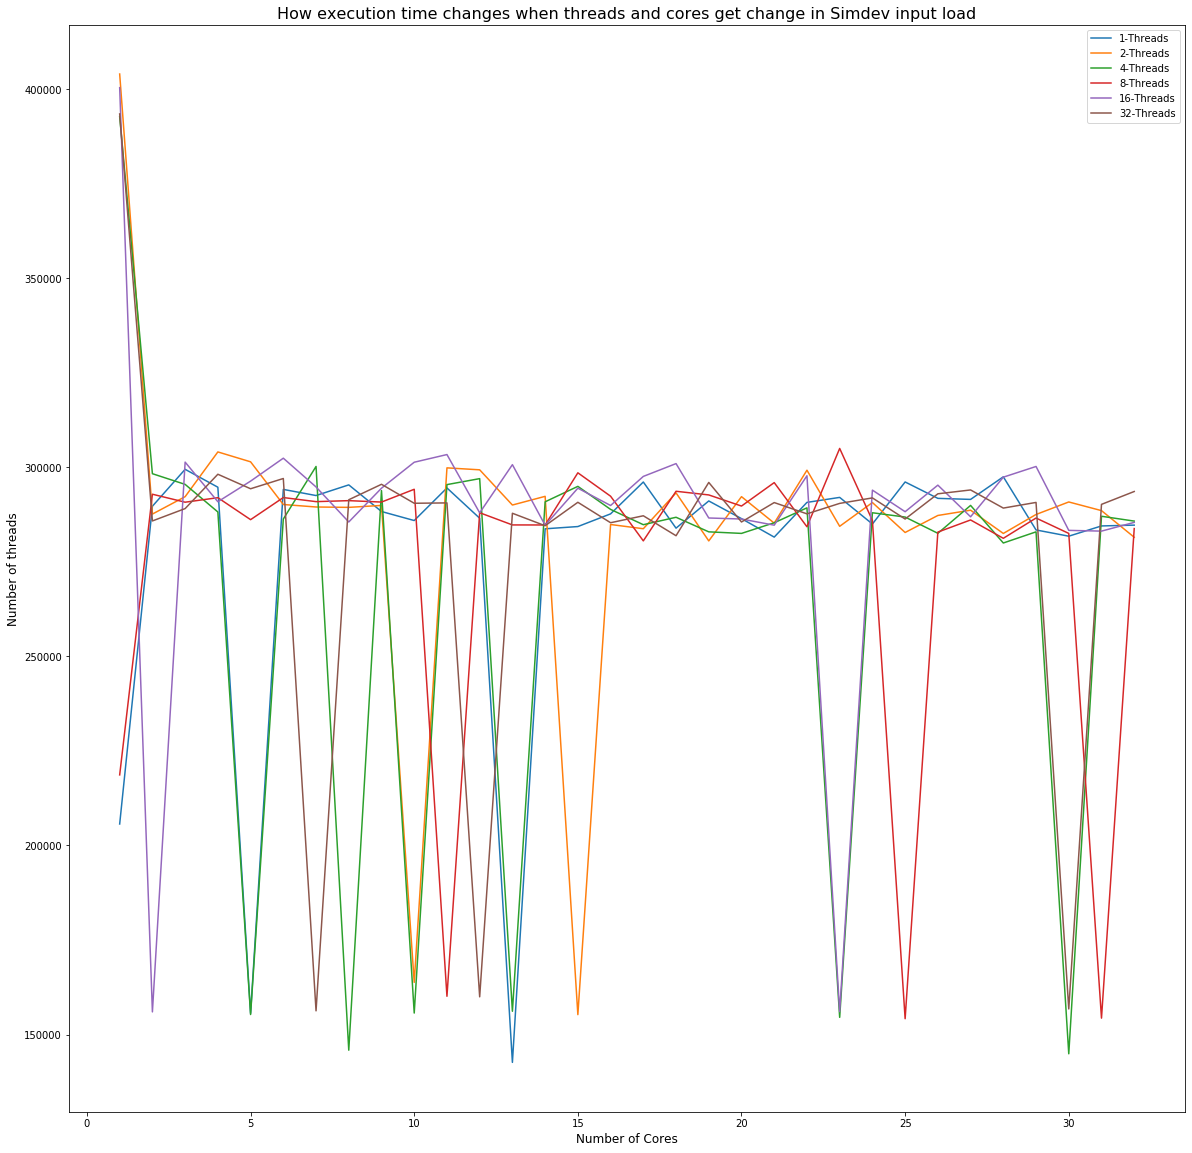

In [121]:
# Filtering for simdev
inputCombinationData = ferretTBBData.loc[(ferretTBBData['input'] == "native") ]

drawChartForInputs(x_axis,inputCombinationData,axs,combinations,'Threads',"How execution time changes when threads and cores get change in Native input load",'Number of Cores',"Number of threads")

<Figure size 1440x1440 with 0 Axes>

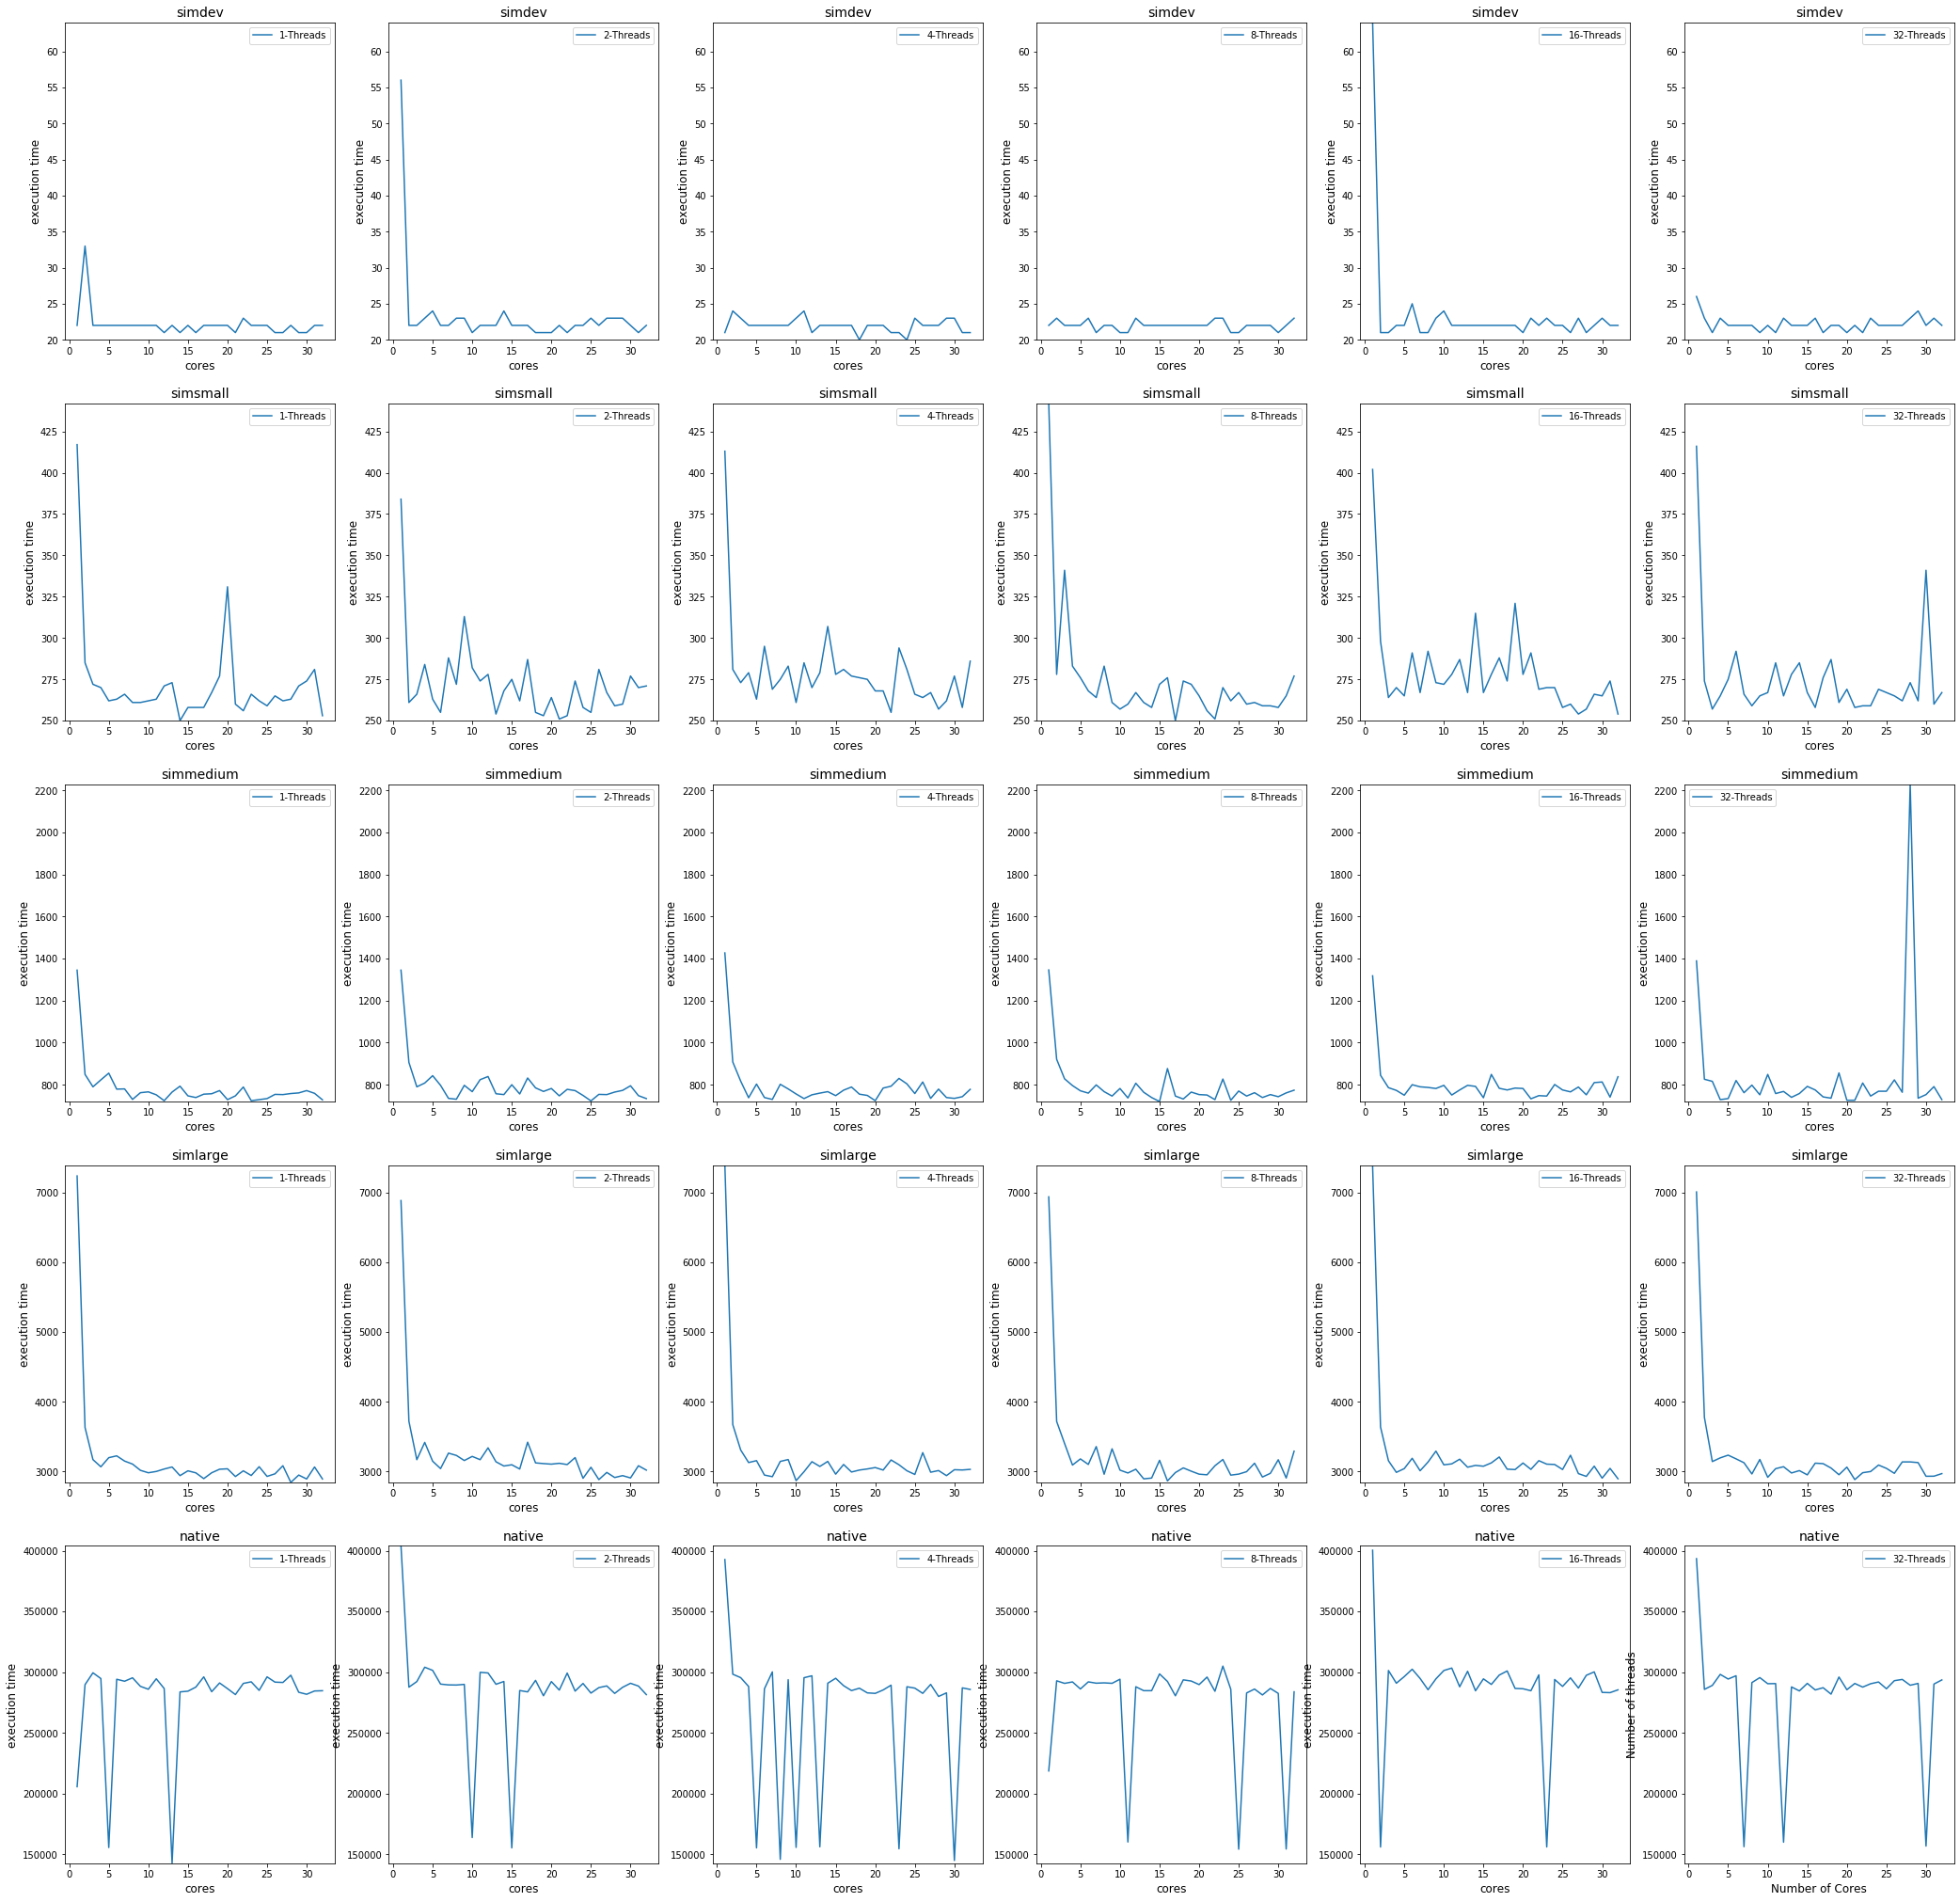

In [124]:

fig=plt.figure() #Creates a new figure
fig, axs = plt.subplots(5,6, figsize=(36, 36))
# axs[0,0].plot(x_axis,(inputCombinationData.loc[inputCombinationData['threads'] == 1])['real'],label='1 thread') #no need for str(x_axis)

# axs[0,0].plot(x_axis,(inputCombinationData.loc[inputCombinationData['threads'] == 2])['real'],label='2 threaded') #no need for str(x_axis)
# axs[0,0].legend()

combinations = [1,2,4,8,16,32]
drawMatrixChartForInputs(x_axis,ferretTBBData,axs,combinations,'Threads',"How execution time changes when threads and cores get change",'Number of Cores',"Number of threads")

In [125]:
#=======================================================================================================================================
#============================================== END OF FERRET ANALYSIS =================================================================
#=======================================================================================================================================

In [129]:
#=======================================================================================================================================
#============================================== START dedup ANALYSIS =================================================================
#=======================================================================================================================================

dedupData =data.loc[(data['name'] == "dedup") & (data['compiler'] == "gcc-pthreads")]
dedupData

,id,name,input,compiler,threads,real,usr,sys,cores
1930,1931,dedup,simdev,gcc-pthreads,1,111,50,47,1
1931,1932,dedup,simsmall,gcc-pthreads,1,778,434,301,1
1932,1933,dedup,simmedium,gcc-pthreads,1,2104,1228,824,1
1933,1934,dedup,simlarge,gcc-pthreads,1,14897,8449,6204,1
1934,1935,dedup,native,gcc-pthreads,1,49436,25846,23146,1
...,...,...,...,...,...,...,...,...,...
2885,2886,dedup,simdev,gcc-pthreads,32,165,57,24,32
2886,2887,dedup,simsmall,gcc-pthreads,32,542,420,238,32
2887,2888,dedup,simmedium,gcc-pthreads,32,1398,1105,592,32
2888,2889,dedup,simlarge,gcc-pthreads,32,10591,7702,3919,32


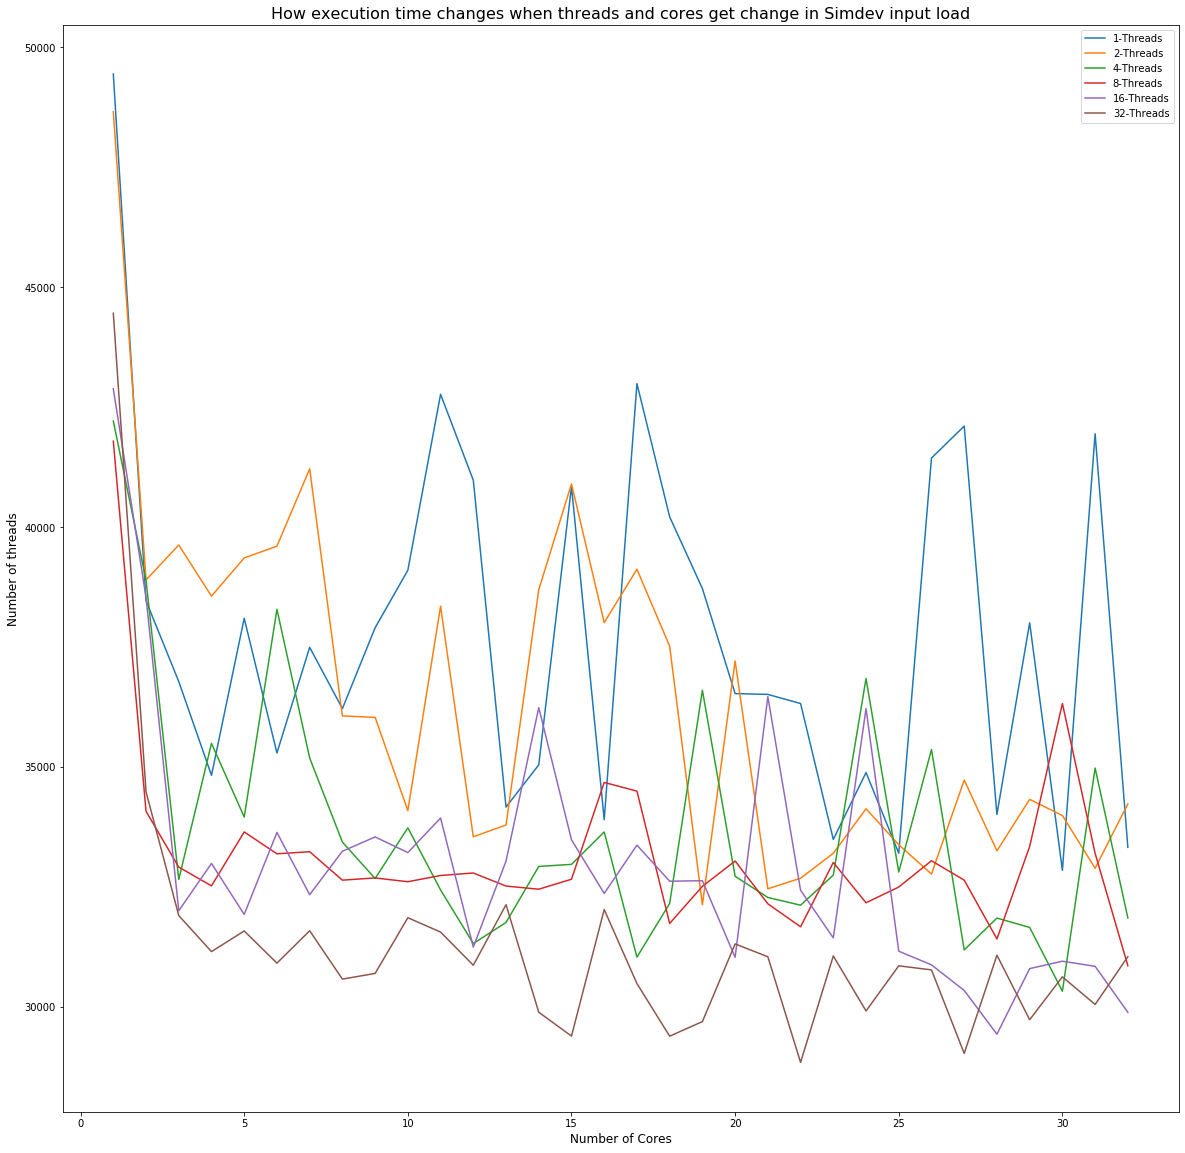

In [130]:
# Filtering for native
inputCombinationData = dedupData.loc[(dedupData['input'] == "native") ]

drawChartForInputs(x_axis,inputCombinationData,axs,combinations,'Threads',"How execution time changes when threads and cores get change in Simdev input load",'Number of Cores',"Number of threads")

<Figure size 1440x1440 with 0 Axes>

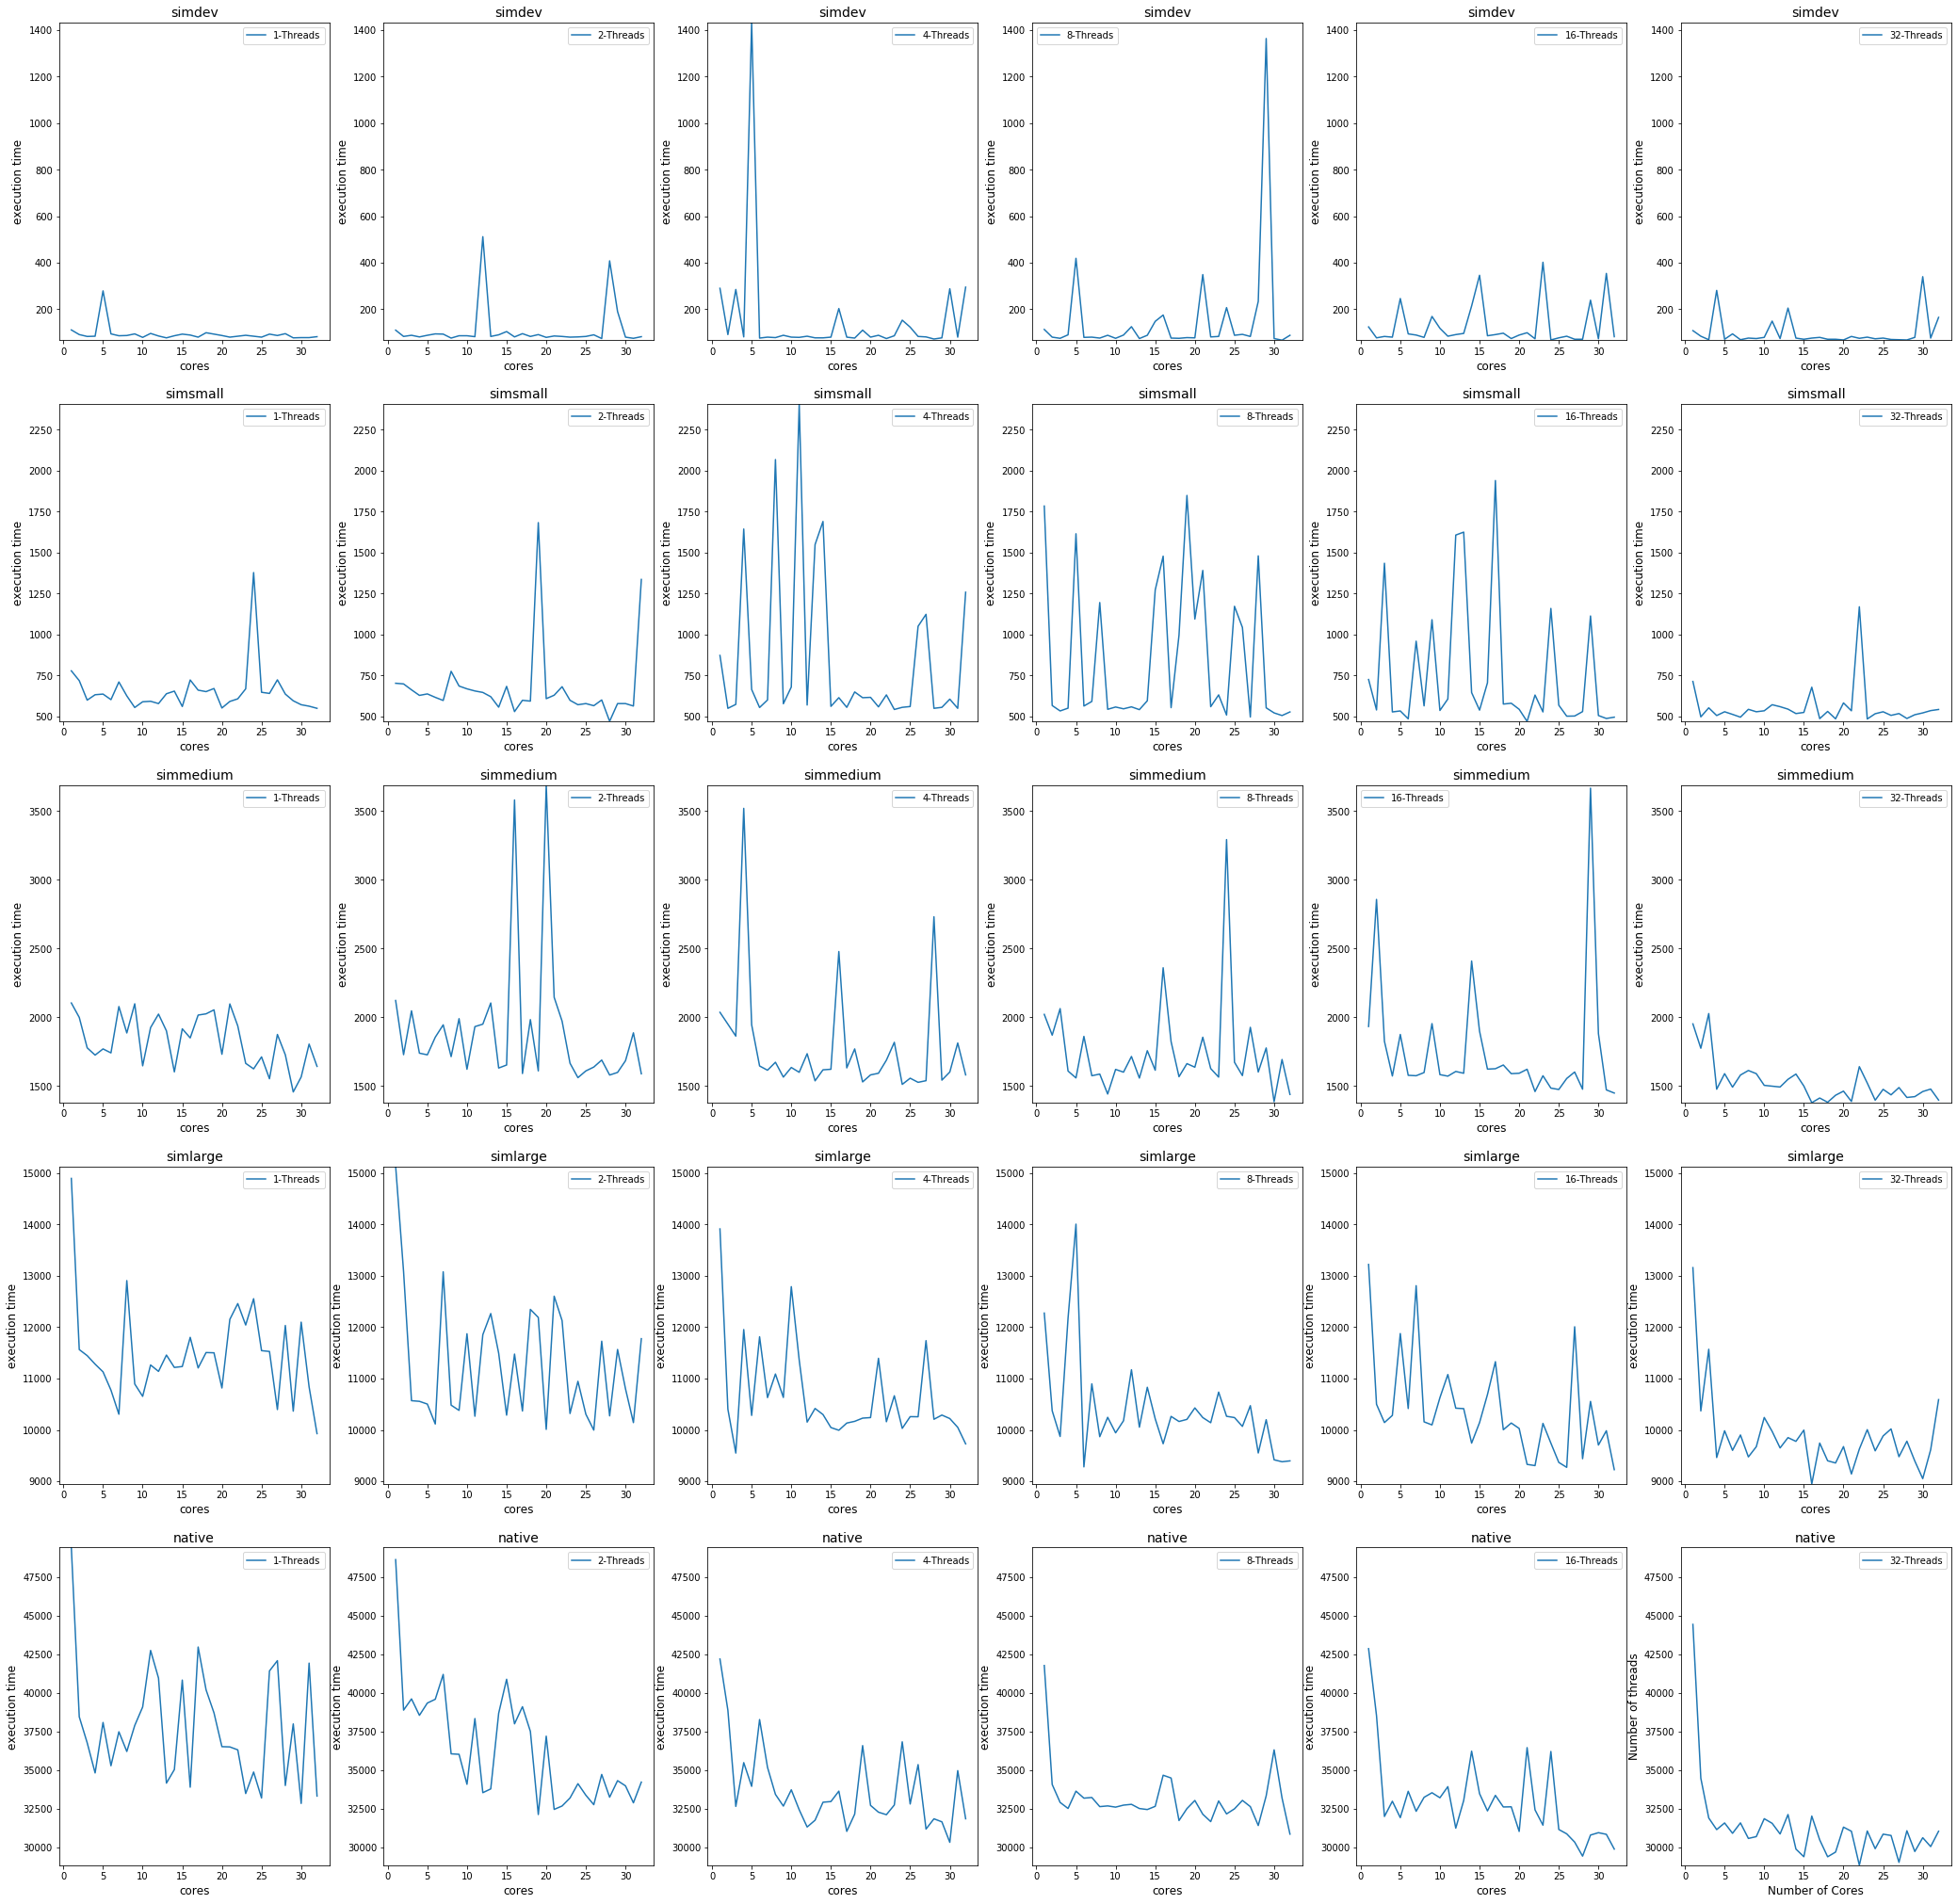

In [131]:
fig=plt.figure() #Creates a new figure
fig, axs = plt.subplots(5,6, figsize=(36, 36))

combinations = [1,2,4,8,16,32]
drawMatrixChartForInputs(x_axis,dedupData,axs,combinations,'Threads',"How execution time changes when threads and cores get change",'Number of Cores',"Number of threads")

In [132]:
#=======================================================================================================================================
#============================================== END OF DEDUP ANALYSIS =================================================================
#=======================================================================================================================================

In [136]:
#=======================================================================================================================================
#============================================== START OF x264 ANALYSIS =================================================================
#=======================================================================================================================================
x264Data =data.loc[(data['name'] == "x264") & (data['compiler'] == "gcc-pthreads")]
x264Data

,id,name,input,compiler,threads,real,usr,sys,cores
2895,2896,x264,simdev,gcc-pthreads,1,4,3,1,1
2896,2897,x264,simsmall,gcc-pthreads,1,555,120,19,1
2897,2898,x264,simmedium,gcc-pthreads,1,1711,707,22,1
2898,2899,x264,simlarge,gcc-pthreads,1,6074,2244,28,1
2899,2900,x264,native,gcc-pthreads,1,116589,78907,604,1
...,...,...,...,...,...,...,...,...,...
3850,3851,x264,simdev,gcc-pthreads,32,4,1,4,32
3851,3852,x264,simsmall,gcc-pthreads,32,124,112,12,32
3852,3853,x264,simmedium,gcc-pthreads,32,1804,657,22,32
3853,3854,x264,simlarge,gcc-pthreads,32,2188,2132,26,32


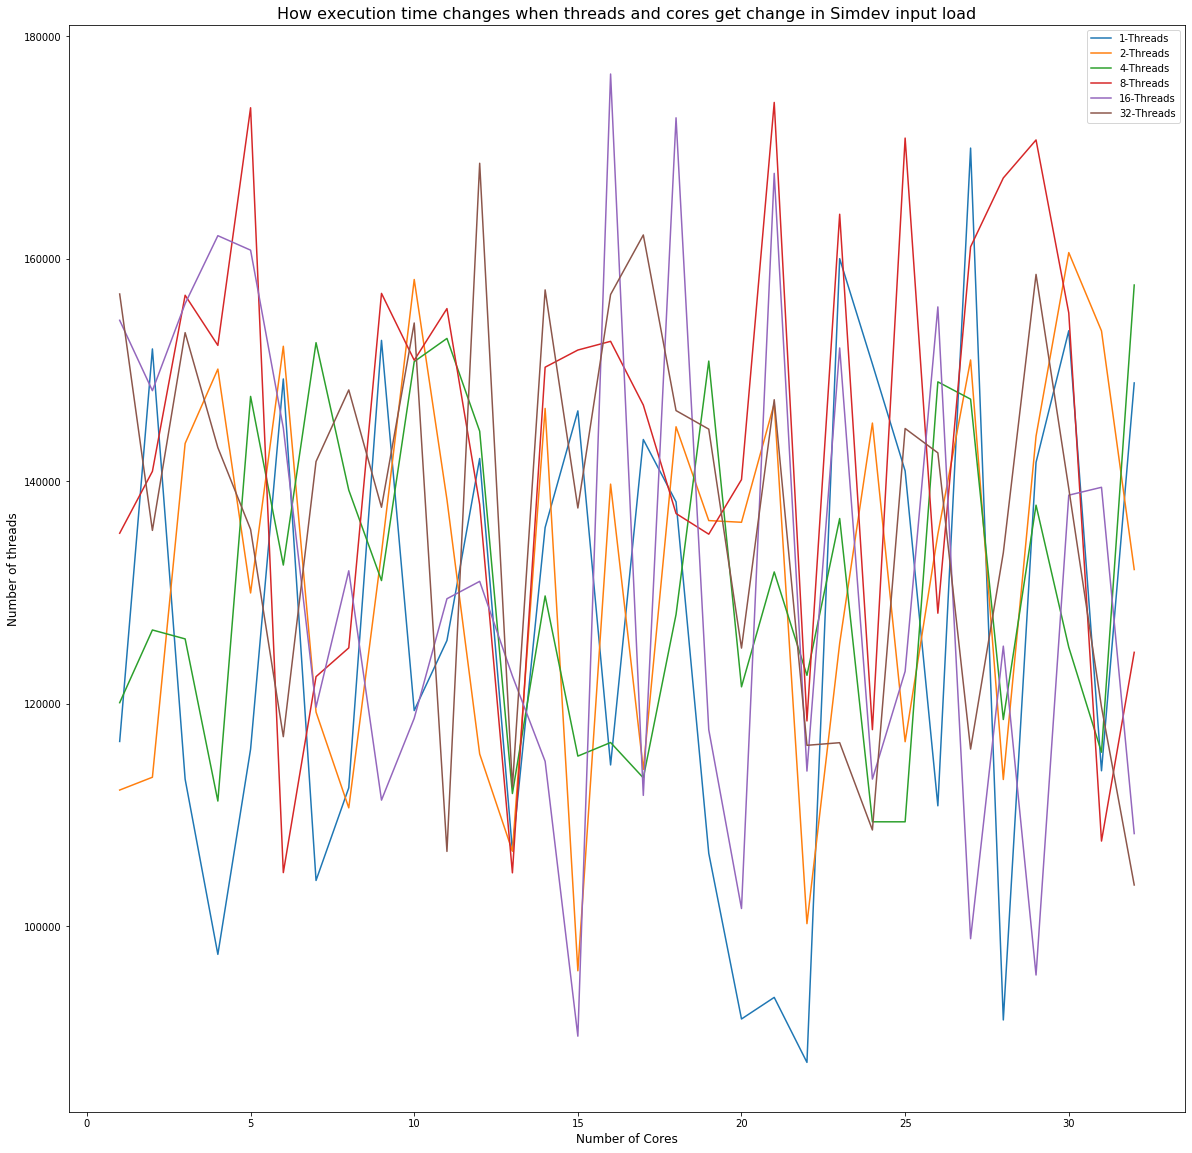

In [137]:
# Filtering for native
inputCombinationData = x264Data.loc[(x264Data['input'] == "native") ]

drawChartForInputs(x_axis,inputCombinationData,axs,combinations,'Threads',"How execution time changes when threads and cores get change in Simdev input load",'Number of Cores',"Number of threads")

<Figure size 1440x1440 with 0 Axes>

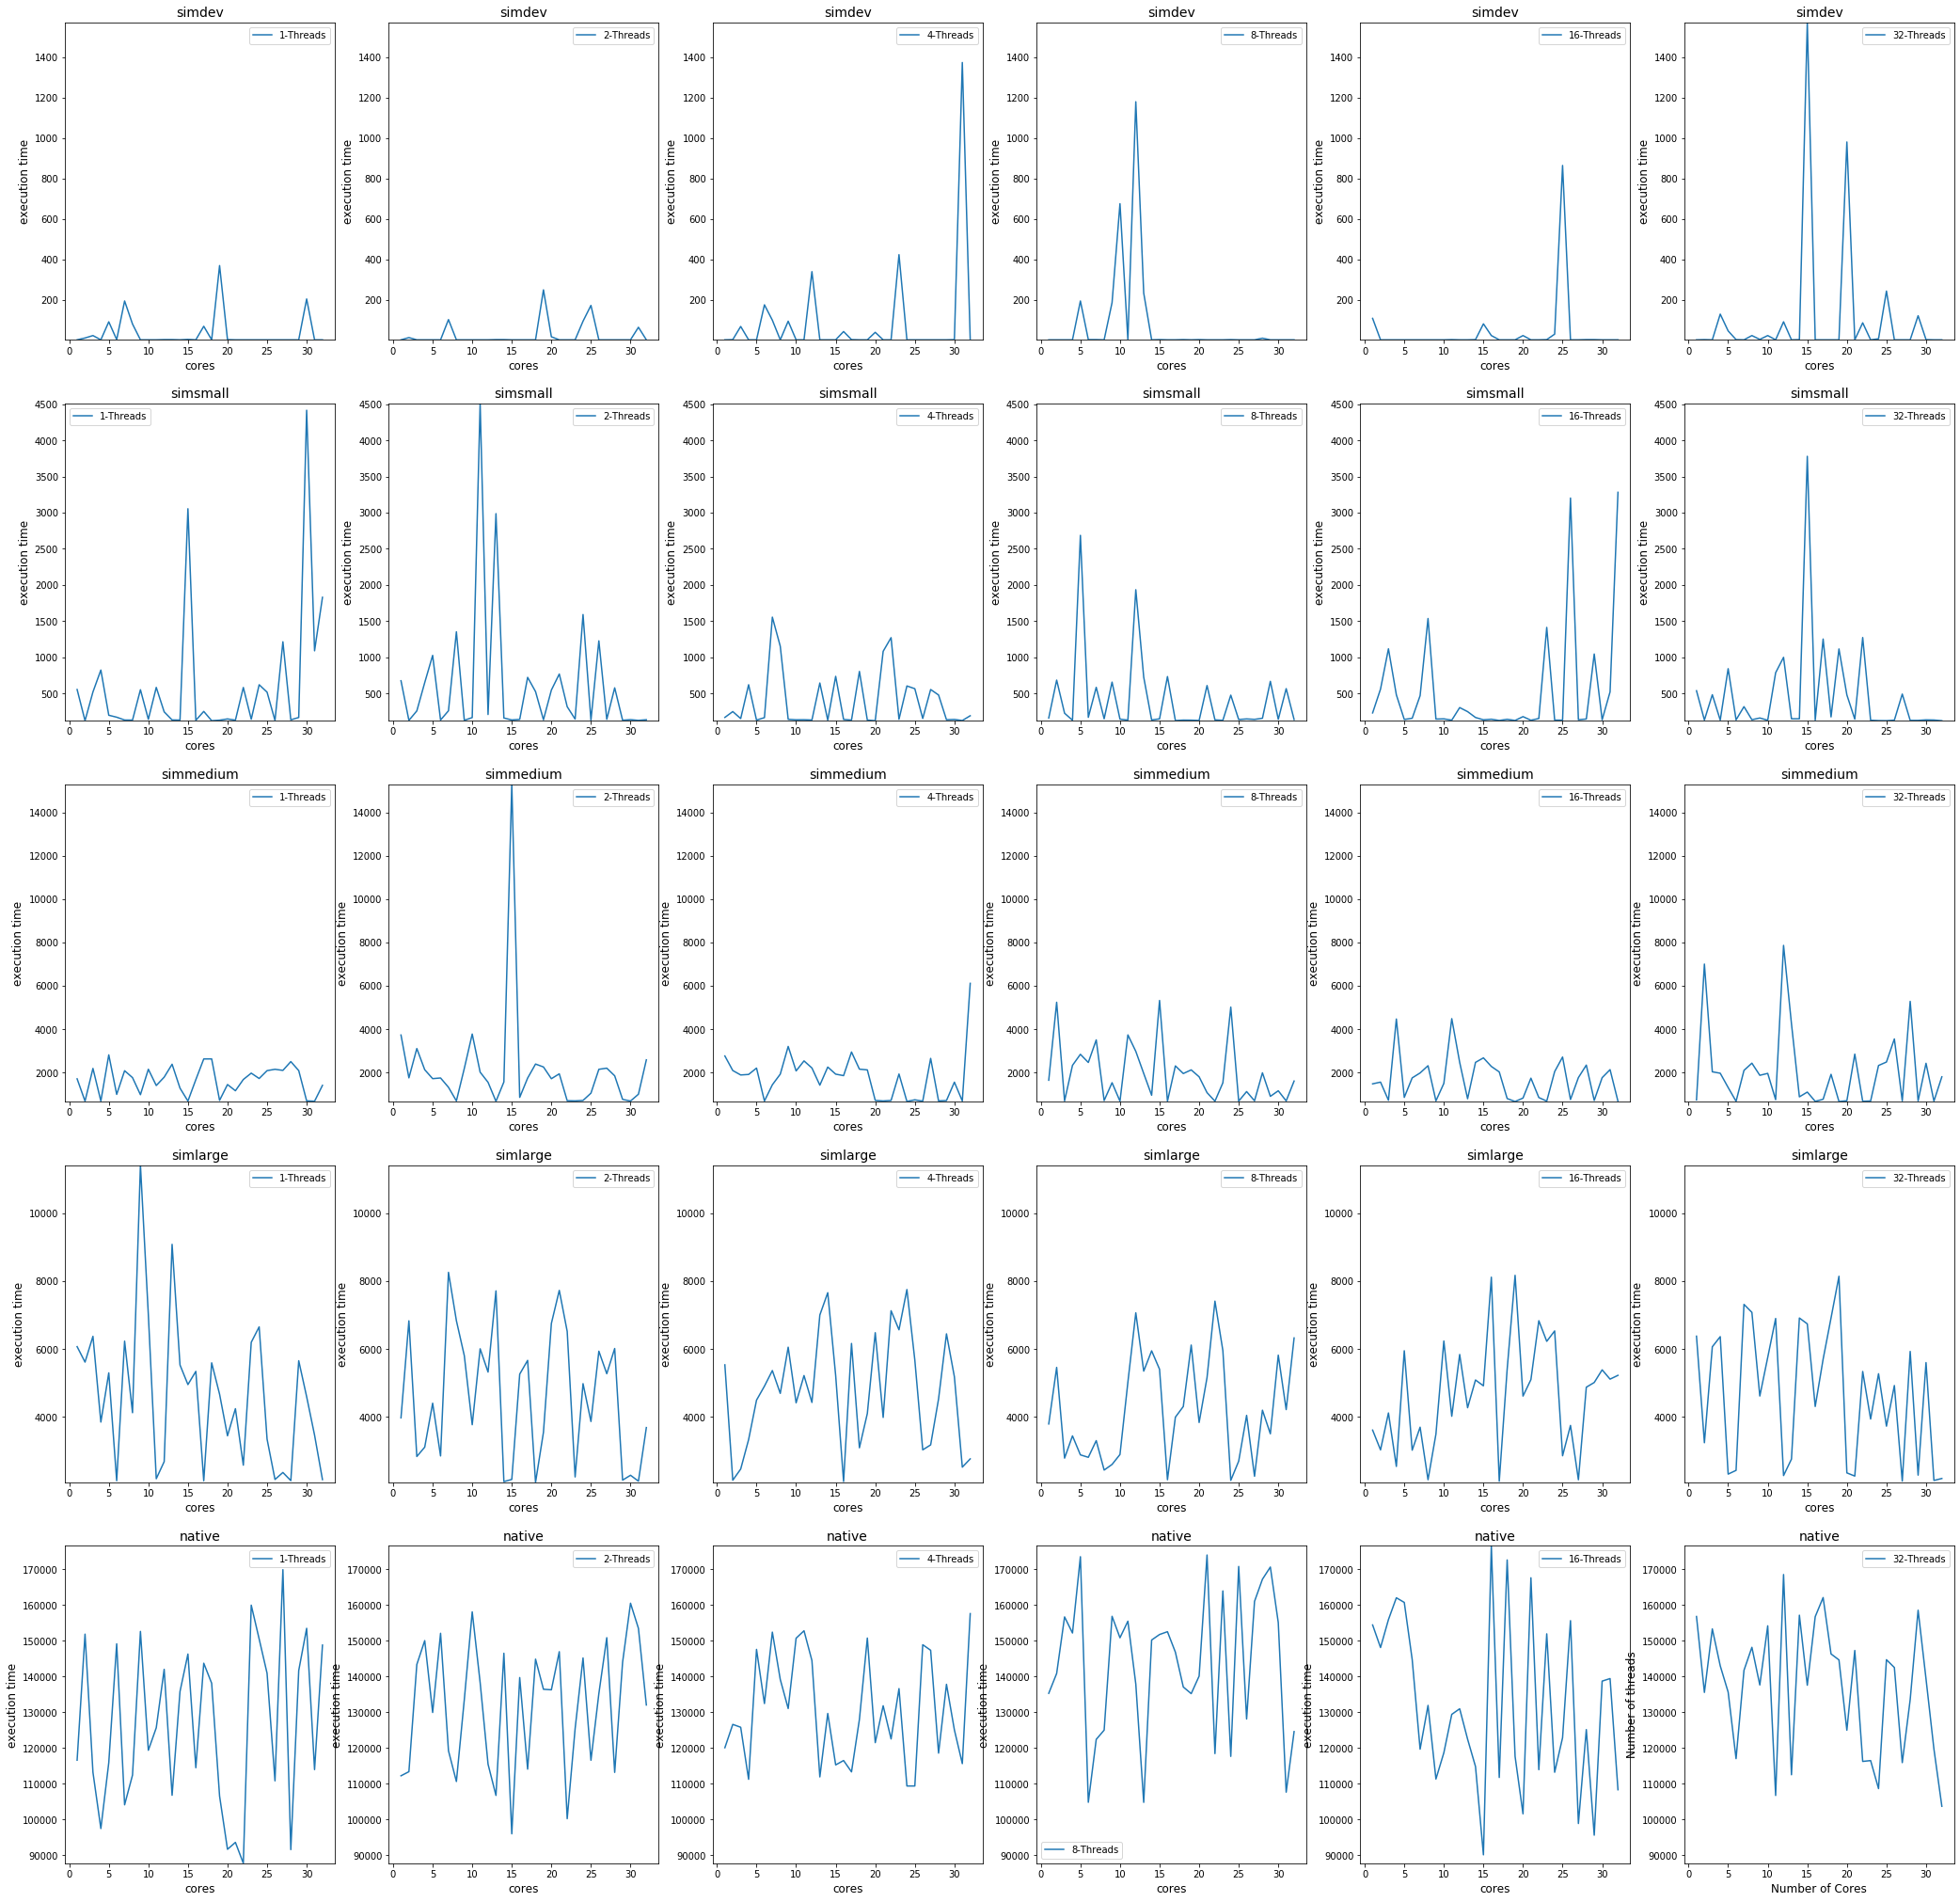

In [138]:
fig=plt.figure() #Creates a new figure
fig, axs = plt.subplots(5,6, figsize=(36, 36))

combinations = [1,2,4,8,16,32]
drawMatrixChartForInputs(x_axis,x264Data,axs,combinations,'Threads',"How execution time changes when threads and cores get change",'Number of Cores',"Number of threads")